# STROKE DETECTION


 Stroke is a major health issue globally, causing many deaths and long-term disabilities. Predicting strokes early can help provide quick treatment and save lives. The purpose of this exploratory data analysis (EDA) is to examine the stroke prediction. We aim to find patterns, relationships, and important factors that may lead to strokes. This analysis will help us better understand the data and improve stroke prediction.





***

### Importing and Inspecting Data

- Let's import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


from scipy import stats
from scipy.stats import shapiro, kstest
from scipy.stats import mannwhitneyu, chi2_contingency
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

<div style="border: 2px solid black; padding: 10px;">
    
- Read csv and see the top 5 rows of the data
</div>

In [2]:
df=pd.read_csv("/home/rohit/Documents/Project1/train.csv")

In [3]:
df.shape 

(15304, 12)

<div style="border: 2px solid black; padding: 10px;">
    
- There are 15,304 individual data entries and each entry has 12 columns.
</div>

In [4]:
df.head() 
df.sample(5)  

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
13231,13231,Female,43.0,0,0,Yes,Private,Urban,77.86,26.8,smokes,0
478,478,Male,50.0,0,0,Yes,Self-employed,Urban,68.28,26.4,smokes,0
2591,2591,Male,8.0,0,0,No,children,Urban,72.71,16.9,Unknown,0
9209,9209,Male,79.0,0,0,Yes,Govt_job,Urban,96.10,25.9,formerly smoked,0
822,822,Female,62.0,0,0,Yes,Govt_job,Rural,111.81,23.4,never smoked,0


In [5]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15304 entries, 0 to 15303
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 15304 non-null  int64  
 1   gender             15304 non-null  object 
 2   age                15304 non-null  float64
 3   hypertension       15304 non-null  int64  
 4   heart_disease      15304 non-null  int64  
 5   ever_married       15304 non-null  object 
 6   work_type          15304 non-null  object 
 7   Residence_type     15304 non-null  object 
 8   avg_glucose_level  15304 non-null  float64
 9   bmi                15304 non-null  float64
 10  smoking_status     15304 non-null  object 
 11  stroke             15304 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 1.4+ MB


<div style="border: 2px solid black; padding: 10px;">

- In our dataset, we have **3 numerical** and **8 categorical** variables
- Our target variable 'Stroke' is integer, not as an object.
- Target variable is coded as 1 (has a stroke) and 0 (does not have a stroke).
- Both 'hypertension' and 'heart_disease" are integer, not as an object.
- It is coded as 1 (has hypertension/heart_disease) and 0 (does not have hypertension/heart disease).
</div>

In [6]:
cat_df=['gender','ever_married','work_type','Residence_type','smoking_status']
cat_df
for col in cat_df:
    print(f"{col}:",df[col].unique())

gender: ['Male' 'Female' 'Other']
ever_married: ['Yes' 'No']
work_type: ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Residence_type: ['Urban' 'Rural']
smoking_status: ['never smoked' 'formerly smoked' 'Unknown' 'smokes']


In [7]:
bool_df=['hypertension','heart_disease','stroke']
for col in bool_df:
    print(f"{col}:",df[col].unique())

hypertension: [0 1]
heart_disease: [0 1]
stroke: [0 1]


<div style="border: 2px solid black; padding: 10px;">


- There are **3 different gender** entries.
- People can be categorised into **5 types on the basis of type of work**.
- There are only **2 residences, Urban and Rural.**
- There are **4 different types of people on the basis of smoking category.**
</div>

### Handling Missing and duplicate values

In [8]:
df.isnull().sum() 

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df.duplicated().sum()  

0

<div style="border: 2px solid black; padding: 10px;">

- Having **no missing and duplicate** values in the dataset
</div>

### Statistical Summary

In [10]:
df.describe() 

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000,15304.000000
mean,7651.500000,41.417708,0.049726,0.023327,89.039853,28.112721,0.041296
std,4418.028595,21.444673,0.217384,0.150946,25.476102,6.722315,0.198981
min,0.000000,0.080000,0.000000,0.000000,55.220000,10.300000,0.000000
25%,3825.750000,26.000000,0.000000,0.000000,74.900000,23.500000,0.000000
50%,7651.500000,43.000000,0.000000,0.000000,85.120000,27.600000,0.000000
75%,11477.250000,57.000000,0.000000,0.000000,96.980000,32.000000,0.000000
max,15303.000000,82.000000,1.000000,1.000000,267.600000,80.100000,1.000000


<div style="border: 2px solid black; padding: 10px;">

- **Age:** The mean age is 41.42 yrs, but there is **variability in age**.The median age (43 years) is slightly higher than the mean age, suggesting a **positively skew** in the age distribution.
- **hypertension :** Only **4.97% of the population has hypertension**, indicating it is rare in this dataset. Skewed towards 0 (no hypertension). The standard deviation is high compared to the mean, which indicates a concentration of values around 0(no hypertension).
- **Heart disease :** **Heart disease only about 2.3%** of the population.
- **avg_glucose_level :** The maximum glucose level (267.60 mg/dL) is significantly higher than the 75th percentile (96.98 mg/dL), **suggesting outliers or high glucose levels**.
- **BMI :** The BMI values are skewed towards higher values, as mean being higher than the median.
- **Outliers** are present in average glucose level and BMI, which might need further investigation or cleaning.

</div>


stroke
0    14672
1      632
Name: count, dtype: int64


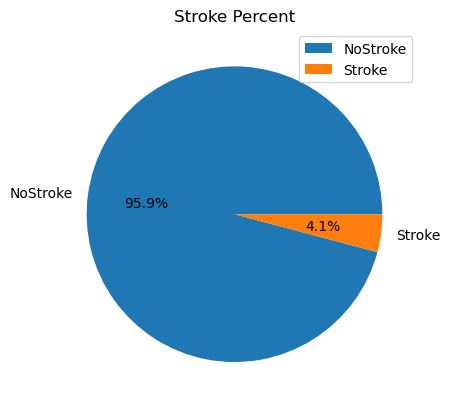

In [11]:
v_count=df['stroke'].value_counts() 
print(v_count)
cat=['NoStroke', 'Stroke']             
plt.pie(v_count,labels=cat,autopct='%1.1f%%') 
plt.title('Stroke Percent')
plt.legend(cat)
plt.show()

- 95.9% of our target variable is 'No stroke'
- 4.1% of our target variable is 'Stroke'


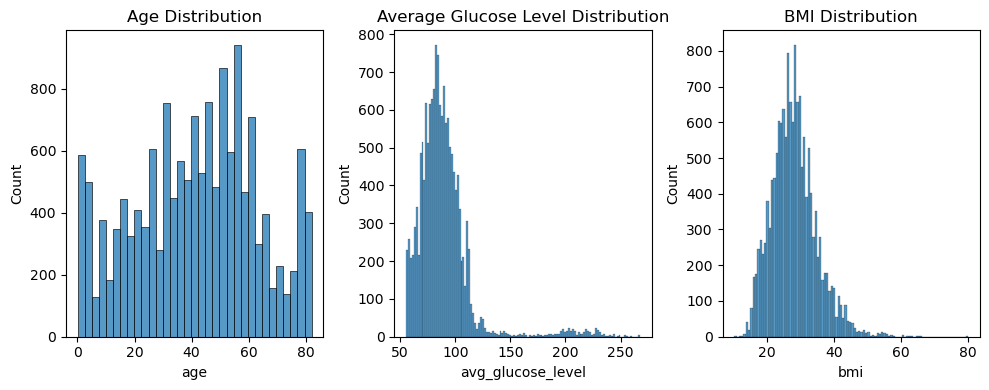

In [12]:
plt.figure(figsize=(10,4))

plt.subplot(1,3,1)
sns.histplot(df['age'])
plt.title('Age Distribution')

plt.subplot(1,3,2)
sns.histplot(df['avg_glucose_level'])
plt.title('Average Glucose Level Distribution')

plt.subplot(1,3,3)
sns.histplot(df['bmi'])
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">
    
- Based on the histogram, **age has slight negatively skewed** shape, other two features have positively skewed shape distribution.
- **Positively skewed glucose levels and BMI** indicates that most individuals have lower glucose levels and BMI. 
</div>

### Outlier Detections

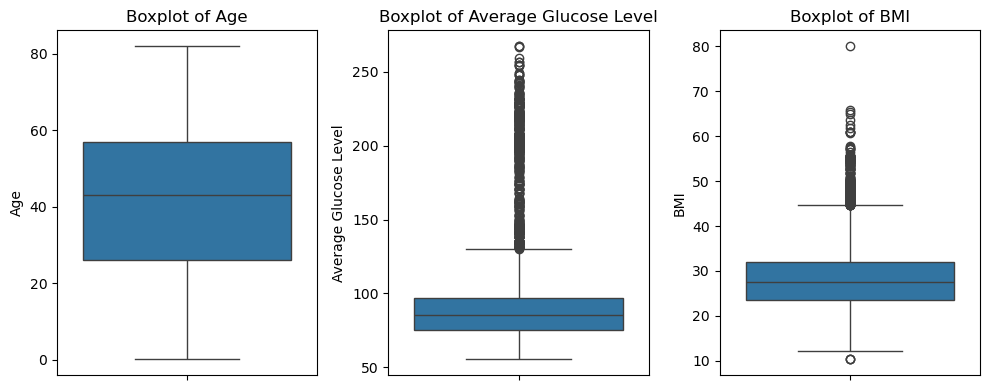

In [13]:
fig,ax=plt.subplots(1,3,figsize=(10,4))

# Create the first boxplot for 'age'
sns.boxplot(y=df['age'],ax=ax[0])
ax[0].set_title('Boxplot of Age')
ax[0].set_ylabel('Age')
ax[0].set_xlabel('')

sns.boxplot(y=df['avg_glucose_level'],ax=ax[1])
ax[1].set_title('Boxplot of Average Glucose Level')
ax[1].set_ylabel('Average Glucose Level')
ax[1].set_xlabel('')

sns.boxplot(y=df['bmi'], ax=ax[2])
ax[2].set_title('Boxplot of BMI')
ax[2].set_ylabel('BMI')
ax[2].set_xlabel('')

fig.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">
    
- The dataset contains a wide range of ages.
- Most individuals have lower glucose levels, but there are outliers with very high levels, **few individuals may have conditions like diabetes.**
- Most individuals have lower BMIs, but there are significant outliers with high BMIs, indicating a **few individuals may be obese.**
</div>

In [14]:
def c_outliers(df,column):
    Q1=df[column].quantile(0.25)
    Q3=df[column].quantile(0.75)
    IQR=Q3-Q1
    l_bound=Q1-1.5 * IQR
    u_bound=Q3 + 1.5 * IQR
    outliers=df[(df[column]<l_bound)|(df[column]>u_bound)]
    return len(outliers)

age_out=c_outliers(df,'age')
glucose_out=c_outliers(df,'avg_glucose_level')
bmi_out=c_outliers(df,'bmi')
print(f'Number of outliers in age: {age_out}')
print(f'Number of outliers in average glucose level: {glucose_out}')
print(f'Number of outliers in BMI: {bmi_out}')

Number of outliers in age: 0
Number of outliers in average glucose level: 545
Number of outliers in BMI: 251


<div style="border: 2px solid black; padding: 10px;">
    
- Given **dataset is medical in nature**, outliers are not removed  as they can provide significant insights into health conditions.
- **These outliers are crucial for identifying high-risk groups and should not be removed.**
</div>

### Univariate Analysis

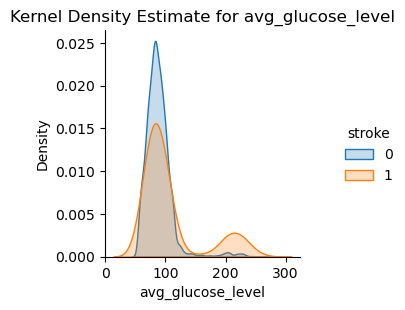

In [15]:
def kde(col):
    grid=sns.FacetGrid(df,hue="stroke")
    grid.map(sns.kdeplot,col,shade=True)
    grid.set_axis_labels(x_var=col,y_var="Density")
    plt.title(f"Kernel Density Estimate for {col}")
    grid.add_legend()
    plt.show()

kde('avg_glucose_level')

<div style="border: 2px solid black; padding: 10px;">
    
- Typically, the average glucose level in blood falls within the range of 50-150. 
However, the observed trend suggests that **individuals experiencing a stroke tend to have elevated glucose levels**. This finding suggests that high glucose levels might be a contributing factor or a potential reason for the incidence of strokes in the studied population.
</div>


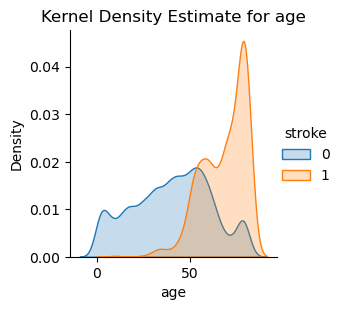

In [16]:
kde('age')

<div style="border: 2px solid black; padding: 10px;">
    
- Indicating that a significant number of **individuals experiencing strokes are older**.
</div>

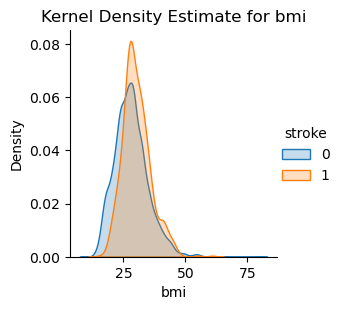

In [17]:
kde('bmi')

<div style="border: 2px solid black; padding: 10px;">
    
- It's important to note that a normal Body Mass Index (BMI) falls within the range of 18.5 to 24.9. 
An BMI below 18.5 is classified as underweight, between 25 and 29.9 as overweight, and 30 or higher as obese.
- Given the observed trend, it suggests that **high BMI levels is contributing factor to the occurrence of stroke**, falling within the overweight or obese categories.
</div>

### Distribution of numeric data

<div style="border: 2px solid black; padding: 10px;">
    
- **Kolmogorov-Smirnov (K-S) test** is a statistical test used to determine if a dataset follows a particular distribution, like a normal distribution. 
- Null Hypothesis  $H_0$ : The data is normally distributed.
- Alternative Hypothesis  $H_1$ : The data is not normally distributed.
- K-S Statistic: The maximum absolute difference between the EDF and the CDF.
- p-value: The probability of observing a test statistic as extreme as, or more extreme than, the observed value under the null hypothesis.
- If the p-value is less than the chosen significance level (e.g., 0.05), we reject the null hypothesis.
</div>


In [18]:
def normality(df,columns):
    for col in columns:
        stat,p=kstest(df[col],'norm',args=(df[col].mean(),df[col].std()))
        print(f'Kolmogorov-Smirnov Test for {col}:')
        print(f'Statistic = {stat:.3f}, p-value = {p:.5f}')
        if p > 0.05:
            print(f'{col} looks normally distributed')
        else:
            print(f'{col} does not look normally distributed')

col = ['age','avg_glucose_level','bmi']
normality(df,col)

Kolmogorov-Smirnov Test for age:
Statistic = 0.049, p-value = 0.00000
age does not look normally distributed
Kolmogorov-Smirnov Test for avg_glucose_level:
Statistic = 0.140, p-value = 0.00000
avg_glucose_level does not look normally distributed
Kolmogorov-Smirnov Test for bmi:
Statistic = 0.050, p-value = 0.00000
bmi does not look normally distributed


<div style="border: 2px solid black; padding: 10px;">

- **None of the features (age, avg_glucose_level, bmi) are normally distributed** based on the Kolmogorov-Smirnov test.
- It means that the distribution of the data does not follow a normal (Gaussian) distribution.
</div>

### Mann Whitney U Test

<div style="border: 2px solid black; padding: 10px;">

Mann-Whitney U Test is used to test if there is a significant difference in the (age,average glucose levels,bmi) between two groups of individuals, based on their stroke status.
- Null Hypothesis $(H0)$: The distributions of (age,average glucose levels,bmi) are the same for individuals with and without a stroke.
- Alternative Hypothesis $(H1)$: The distributions of (age,average glucose levels,bmi) are different for individuals with and without a stroke.
</div>

In [19]:
stroke=df[df['stroke'] == 1]
no_stroke=df[df['stroke'] == 0]

def mann_tests(df,columns):
    for col in columns:
        stat,p_value=mannwhitneyu(stroke[col],no_stroke[col])
        print(f'Mann-Whitney U test for {col}:')
        print(f'Statistic = {stat:.3f}, p-value = {p_value:.3f}')
        if p_value < 0.05:
            print(f'There is a significant difference in {col} between stroke and no stroke groups.')
        else:
            print(f'There is no significant difference in {col} between stroke and no stroke groups.')
        print()
col=['age','avg_glucose_level','bmi']
mann_tests(df,col)

Mann-Whitney U test for age:
Statistic = 8103773.500, p-value = 0.000
There is a significant difference in age between stroke and no stroke groups.

Mann-Whitney U test for avg_glucose_level:
Statistic = 5304229.500, p-value = 0.000
There is a significant difference in avg_glucose_level between stroke and no stroke groups.

Mann-Whitney U test for bmi:
Statistic = 5647542.000, p-value = 0.000
There is a significant difference in bmi between stroke and no stroke groups.



<div style="border: 2px solid black; padding: 10px;">

- The p-value is less than 0.05, indicating a **significant difference in age between the stroke and no-stroke** groups. This suggests that age distributions differ significantly between the two groups.
- The p-value is less than 0.05, indicating a **significant difference in average glucose levels between the stroke and no-stroke groups**. This suggests that glucose level distributions differ significantly between the two groups.
- The p-value is less than 0.05, indicating a **significant difference in BMI between the stroke and no-stroke groups**. This suggests that BMI distributions differ significantly between the two groups.
</div>

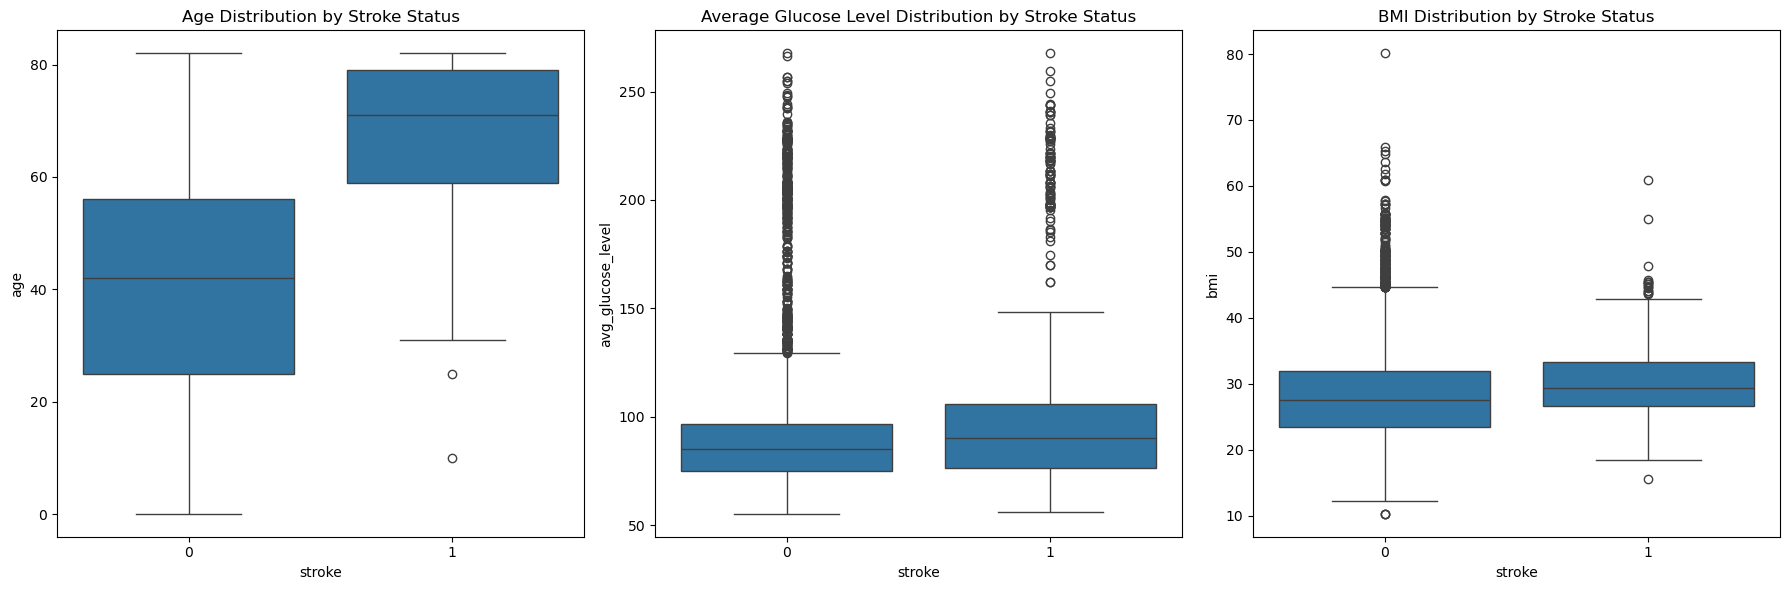

In [20]:
plt.figure(figsize=(18,6))


plt.subplot(1,3,1)
sns.boxplot(x='stroke',y='age',data=df)
plt.title('Age Distribution by Stroke Status')

plt.subplot(1,3,2)
sns.boxplot(x='stroke',y='avg_glucose_level',data=df)
plt.title('Average Glucose Level Distribution by Stroke Status')

# Boxplot for BMI
plt.subplot(1,3,3)
sns.boxplot(x='stroke',y='bmi',data=df)
plt.title('BMI Distribution by Stroke Status')

plt.tight_layout()
plt.show()

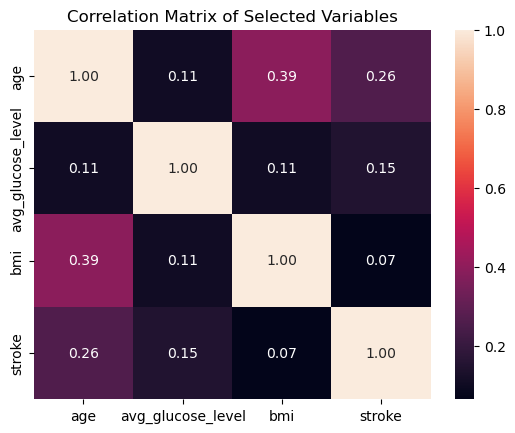

In [21]:
cols=['age','avg_glucose_level','bmi','stroke']
corr_matrix=df[cols].corr()
sns.heatmap(corr_matrix,annot=True,fmt='.2f')
plt.title('Correlation Matrix of Selected Variables')
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- This indicates a moderate positive correlation between age and stroke.
- A weak positive correlation between average glucose level and stroke.
- A very weak positive correlation between BMI and stroke
- Overall **age shows the strongest correlation with stroke**, while **average glucose level and BMI have weaker relationships.**
</div>

### Categorical Variable

Frequency distribution for gender:
gender
Female    9446
Male      5857
Other        1
Name: count, dtype: int64


Frequency distribution for hypertension:
hypertension
0    14543
1      761
Name: count, dtype: int64


Frequency distribution for heart_disease:
heart_disease
0    14947
1      357
Name: count, dtype: int64


Frequency distribution for ever_married:
ever_married
Yes    10385
No      4919
Name: count, dtype: int64


Frequency distribution for work_type:
work_type
Private          9752
children         2038
Self-employed    1939
Govt_job         1533
Never_worked       42
Name: count, dtype: int64


Frequency distribution for Residence_type:
Residence_type
Rural    7664
Urban    7640
Name: count, dtype: int64


Frequency distribution for smoking_status:
smoking_status
never smoked       6281
Unknown            4543
formerly smoked    2337
smokes             2143
Name: count, dtype: int64


Frequency distribution for stroke:
stroke
0    14672
1      632
Name: count, dtype: i

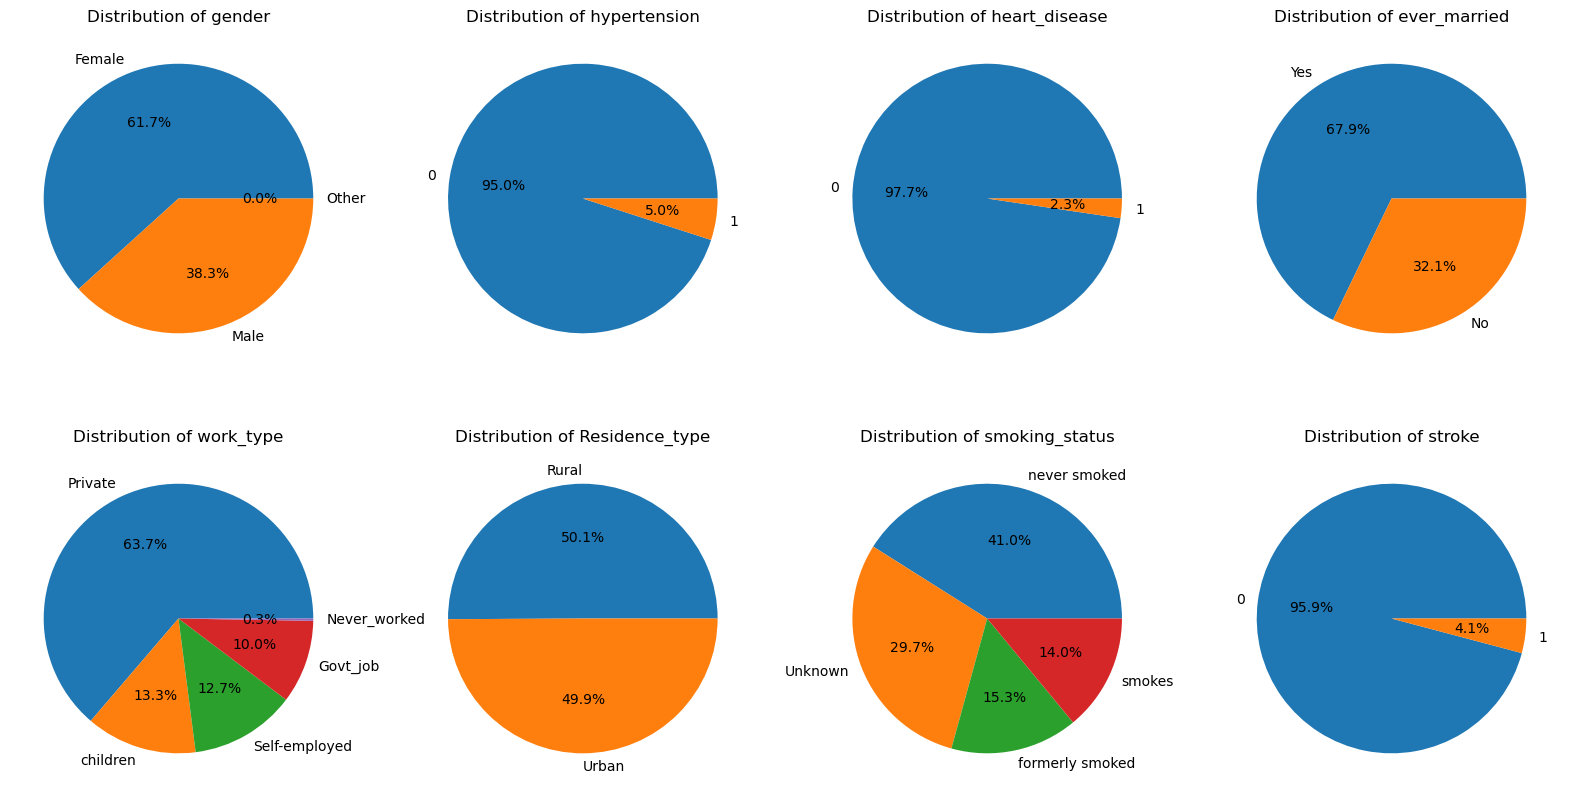

In [22]:
cat_df=['gender','hypertension','heart_disease','ever_married','work_type','Residence_type','smoking_status','stroke']
for var in cat_df:
    print(f"Frequency distribution for {var}:")
    print(df[var].value_counts())
    print("\n")
plt.figure(figsize=(20,10))

for i, var in enumerate(cat_df, 1):
    plt.subplot(2,4,i)
    counts = df[var].value_counts()
    plt.pie(counts,labels=counts.index,autopct='%1.1f%%')
    plt.title(f'Distribution of {var}')
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- The dataset has a **majority of female** individuals.
- A majority of individuals in the dataset are **married**.
- Most individuals are in **private employment**.
- The dataset has a nearly **equal distribution of individuals from rural and urban areas.**
- There are noticeable **imbalance in hypertension, heart disease, and certain work types.** This could impact the analysis.
</div>

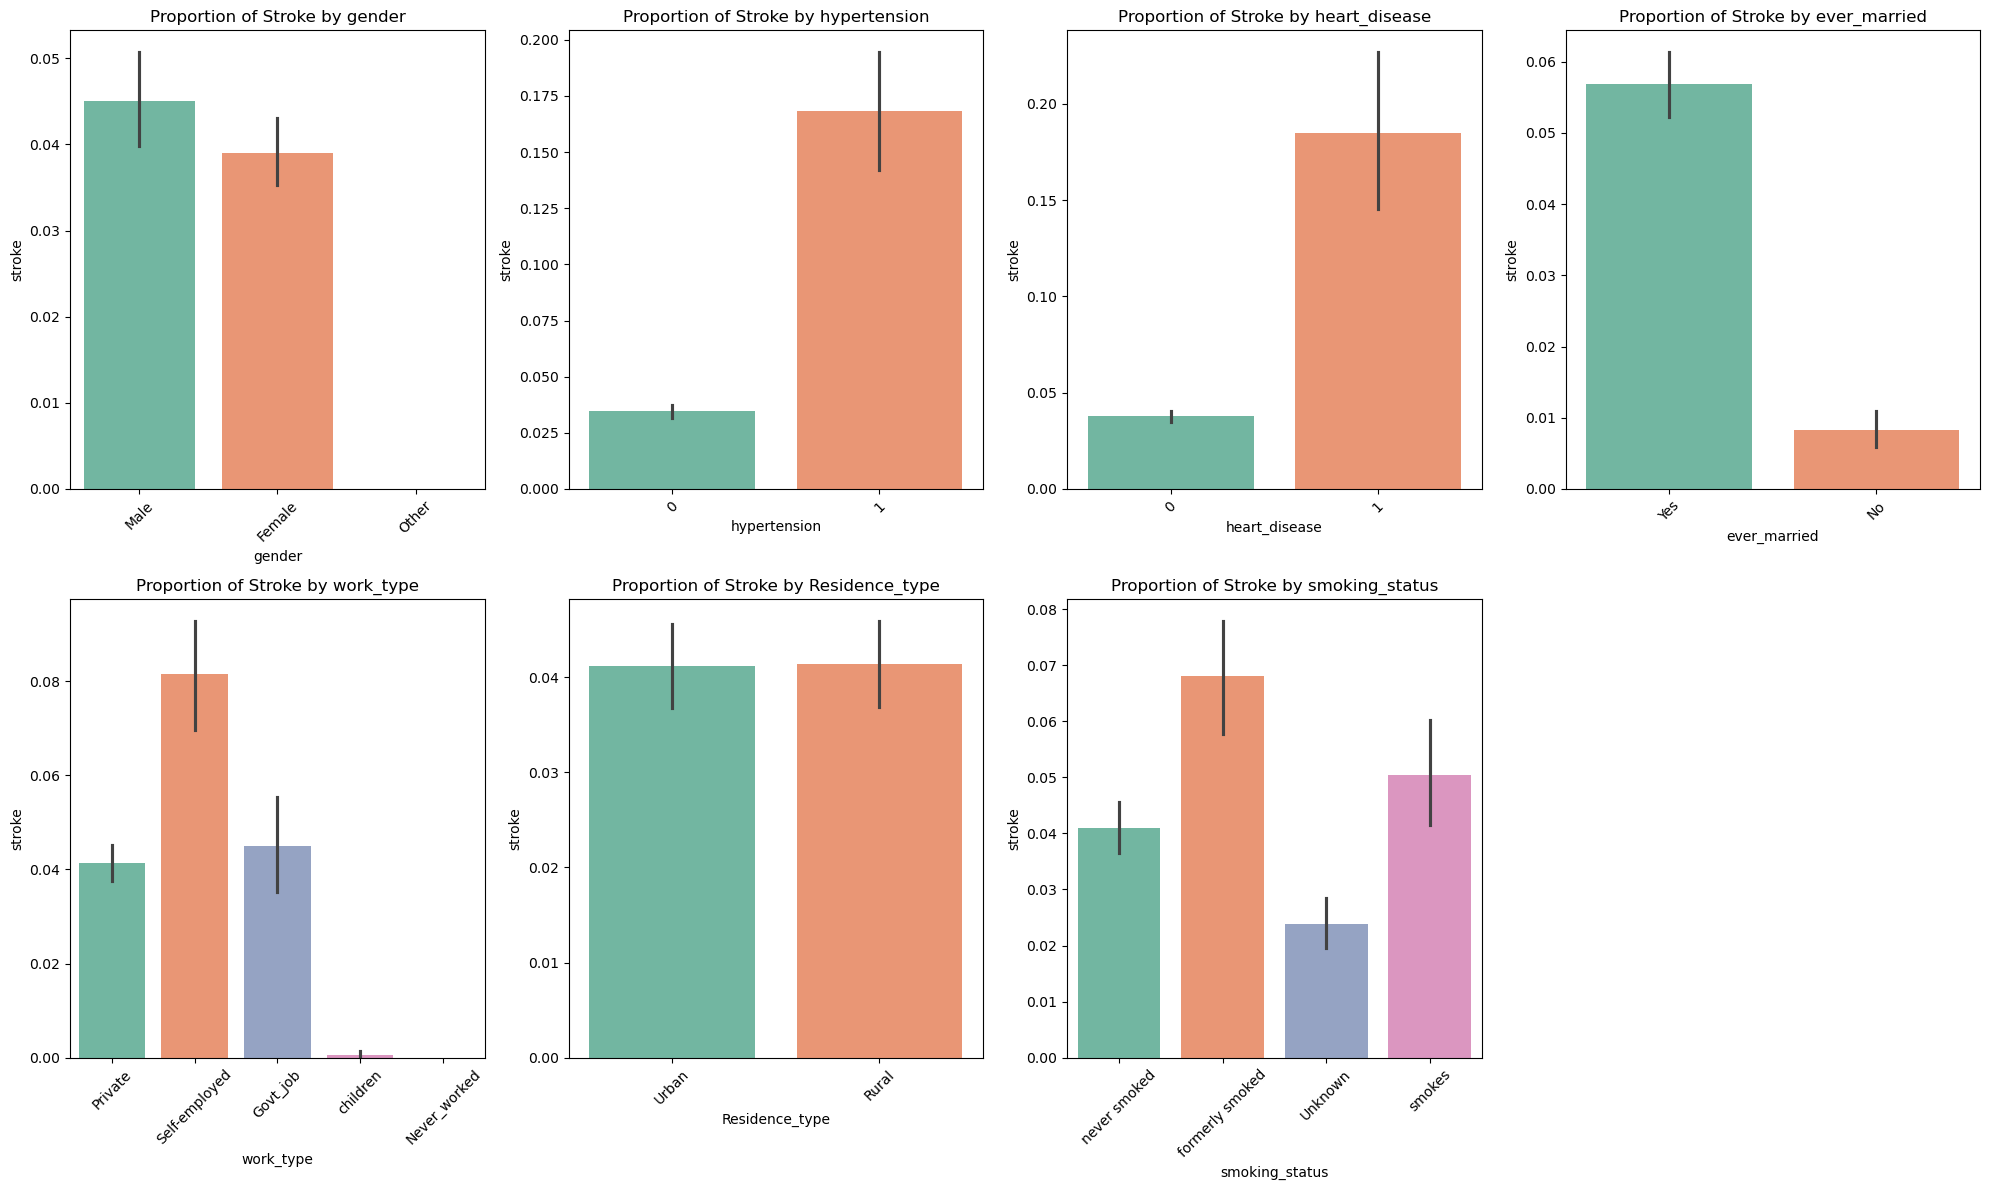

In [23]:
plt.figure(figsize=(20,12))
for i, var in enumerate(cat_df):
    if var!='stroke':
        plt.subplot(2,4,i+1)
        sns.barplot(x=var,y='stroke',data=df,palette='Set2')
        plt.title(f'Proportion of Stroke by {var}')
        plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">
    
The plots visualize the relationship between the categorical variables and the proportion of stroke occurrences.
- Different work types may show varying proportions of stroke occurrences. 
- A **higher proportion** of stroke cases among individuals with **hypertension.**
- A **higher proportion** of stroke cases among individuals with **heart disease**
- A similar proportions for rural and urban residents.
- **Varying proportions** of stroke occurrences across different **smoking statuses**.
  </div>

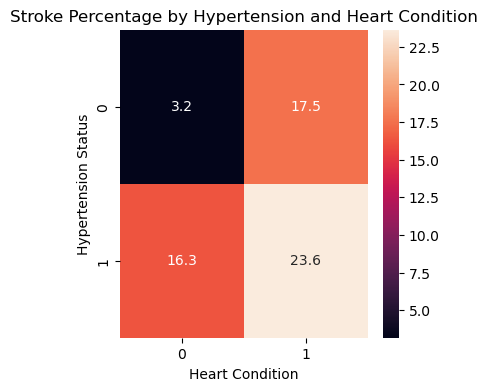

In [24]:
stroke_per=df.groupby(['hypertension','heart_disease']).stroke.mean().unstack() * 100
fig,ax=plt.subplots(figsize=(4,4))
sns.heatmap(stroke_per,ax=ax,annot=True,fmt='.1f')
ax.set_title('Stroke Percentage by Hypertension and Heart Condition')
ax.set_xlabel('Heart Condition')
ax.set_ylabel('Hypertension Status')
plt.show()

<div style="border: 2px solid black; padding: 10px;">
    
- People with **heart condition with hypertension** are **likely to have stroke.**
- Both heatmaps show high percentages, it might indicate that the combination is frequent, it might not significantly differentiate between stroke and non-stroke cases.
- The combination showing 23.6% in stroke indicates that this combination of hypertension and heart disease (or lack thereof) is slightly more prevalent in stroke cases compared to non-stroke cases.
</div>


ever_married  gender        No       Yes
0             Female  0.089674  0.910326
1               Male  0.030303  0.969697
   gender ever_married  proportion
0  Female           No    0.089674
1    Male           No    0.030303
2  Female          Yes    0.910326
3    Male          Yes    0.969697


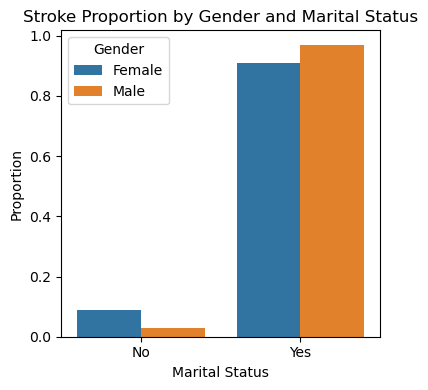

In [25]:
healthy=df[df['stroke']==0]
stroke=df[df['stroke']==1]
stroke_prop=pd.crosstab(stroke['gender'],stroke['ever_married'],normalize='index').reset_index()
print(stroke_prop)
stroke_melt=stroke_prop.melt(id_vars='gender',var_name='ever_married',value_name='proportion')
print(stroke_melt)
fig,ax=plt.subplots(figsize=(4,4))
sns.barplot(x='ever_married',y='proportion',hue='gender',data=stroke_melt,ax=ax)
ax.set_title('Stroke Proportion by Gender and Marital Status')
ax.set_xlabel('Marital Status')
ax.set_ylabel('Proportion')
ax.legend(title='Gender')
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- **Married individuals** have a notably **higher proportion of strokes** compared to unmarried individuals.
</div>

work_type  gender  Govt_job   Private  Self-employed  children
0          Female  0.111413  0.635870       0.252717  0.000000
1            Male  0.106061  0.643939       0.246212  0.003788
   gender      work_type  proportion
0  Female       Govt_job    0.111413
1    Male       Govt_job    0.106061
2  Female        Private    0.635870
3    Male        Private    0.643939
4  Female  Self-employed    0.252717
5    Male  Self-employed    0.246212
6  Female       children    0.000000
7    Male       children    0.003788


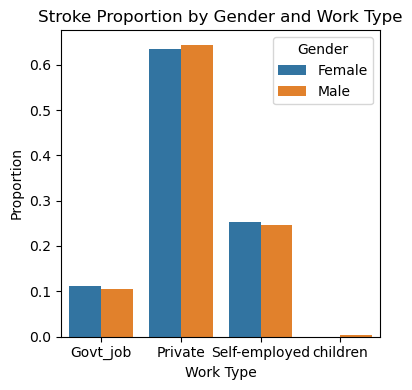

In [26]:
stroke_prop=pd.crosstab(stroke['gender'],stroke['work_type'],normalize='index').reset_index()
print(stroke_prop)
stroke_melt=stroke_prop.melt(id_vars='gender',var_name='work_type',value_name='proportion')
print(stroke_melt)
fig,ax=plt.subplots(figsize=(4,4))
sns.barplot(x='work_type',y='proportion',hue='gender',data=stroke_melt,ax=ax)
ax.set_title('Stroke Proportion by Gender and Work Type')
ax.set_xlabel('Work Type')
ax.set_ylabel('Proportion')
ax.legend(title='Gender')
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- Proportion of stroke cases varies across different work types for each gender.
- **Private work** type has a **higher proportion of stroke**
- **Male** gender has a higher proportion of stroke cases in a private work type.
</div>

smoking_status  gender   Unknown  formerly smoked  never smoked    smokes
0               Female  0.176630         0.201087      0.470109  0.152174
1                 Male  0.162879         0.321970      0.318182  0.196970
   gender   smoking_status  proportion
0  Female          Unknown    0.176630
1    Male          Unknown    0.162879
2  Female  formerly smoked    0.201087
3    Male  formerly smoked    0.321970
4  Female     never smoked    0.470109
5    Male     never smoked    0.318182
6  Female           smokes    0.152174
7    Male           smokes    0.196970


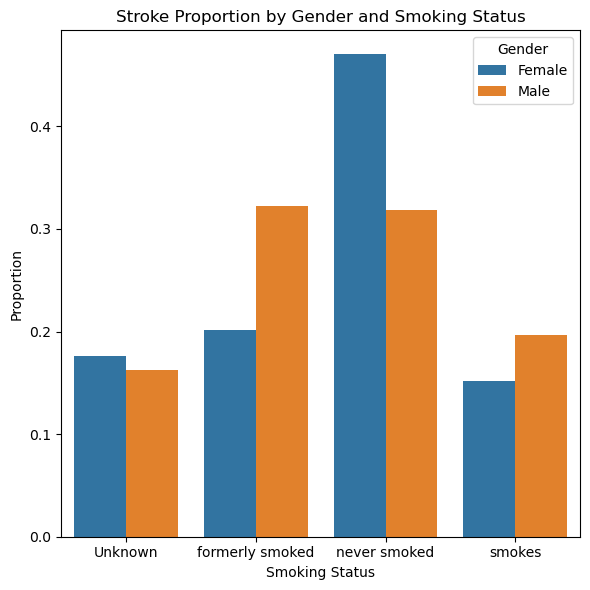

In [27]:
stroke_prop=pd.crosstab(stroke['gender'],stroke['smoking_status'],normalize='index').reset_index()
print(stroke_prop)
stroke_melt=stroke_prop.melt(id_vars='gender',var_name='smoking_status',value_name='proportion')
print(stroke_melt)
fig,ax=plt.subplots(figsize=(6,6))
sns.barplot(x='smoking_status',y='proportion',hue='gender',data=stroke_melt,ax=ax)
ax.set_title('Stroke Proportion by Gender and Smoking Status')
ax.set_xlabel('Smoking Status')
ax.set_ylabel('Proportion')
ax.legend(title='Gender')
plt.tight_layout()
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- There are differeneces based on the smoking habits.
- A **formerly smoked person** has a **high proportion get stroke** than person never smoked.
</div>

hypertension                   0         1
gender smoking_status                     
Female Unknown          0.022284  0.250000
       formerly smoked  0.047276  0.168539
       never smoked     0.032628  0.162162
       smokes           0.038875  0.116883
Male   Unknown          0.018839  0.206897
       formerly smoked  0.074398  0.197674
       never smoked     0.035638  0.133858
       smokes           0.048811  0.224138
Other  Unknown          0.000000       NaN


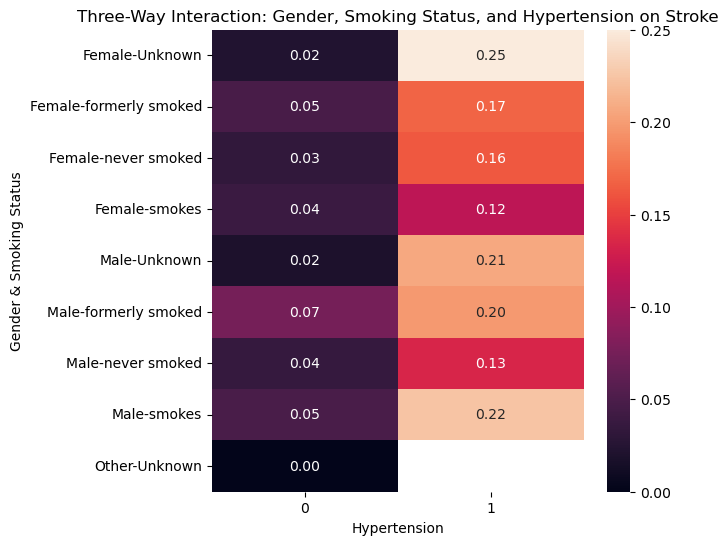

In [28]:
contingency_tab=pd.crosstab(index=[df['gender'],df['smoking_status']],columns=df['hypertension'],values=df['stroke'],aggfunc='mean')
print(contingency_tab)
contingency_tab_reset=contingency_tab.reset_index()
contingency_tab_reset=contingency_tab_reset.melt(id_vars=['gender','smoking_status'],var_name='hypertension',value_name='stroke_proportion')
plt.figure(figsize=(6,6))
sns.heatmap(contingency_tab,annot=True,fmt='.2f')
plt.title('Three-Way Interaction: Gender, Smoking Status, and Hypertension on Stroke')
plt.xlabel('Hypertension')
plt.ylabel('Gender & Smoking Status')
plt.show()

<div style="border: 2px solid black; padding: 10px;">

- Male unknown and **Male Formerly smokes with hypertension** are associated with **higher stroke proportions.**
- Female unknown and Female Formerly smokes and hypertension are associated with higher stroke proportions.
</div>


### CHI SQUARE TEST

The Chi-Square Test is a statistical method used to **determine whether there is a significant association between two categorical variables**. 
- Null Hypothesis $(H_0)$: The two categorical variables are independent of each other. There is no association between them.
- Alternative Hypothesis $(H_1)$: The two categorical variables are not independent. There is an association between them.
- If the p-value is less than the significance level (e.g., 0.05) reject the null hypothesis.

In [29]:
def chi2_test(var1,var2):
    contingency=pd.crosstab(df[var1], df[var2])
    chi2_stat,p_value,dof,expected=chi2_contingency(contingency)
    print(f'\nContingency Table for {var1} and {var2}:\n{contingency}')
    print(f'Chi-Square Statistic: {chi2_stat}')
    print(f'p-value: {p_value}')
    print(f'Degrees of Freedom: {dof}')
    print(f'Expected Frequencies:\n{expected}')

chi2_test('gender','stroke')
chi2_test('work_type','stroke')
chi2_test('hypertension','stroke')
chi2_test('heart_disease','stroke')
chi2_test('ever_married','stroke')
chi2_test('Residence_type','stroke')
chi2_test('smoking_status','stroke')


Contingency Table for gender and stroke:
stroke     0    1
gender           
Female  9078  368
Male    5593  264
Other      1    0
Chi-Square Statistic: 3.4587986896949725
p-value: 0.1773909287515115
Degrees of Freedom: 2
Expected Frequencies:
[[9.05591427e+03 3.90085729e+02]
 [5.61512703e+03 2.41872974e+02]
 [9.58703607e-01 4.12963931e-02]]

Contingency Table for work_type and stroke:
stroke            0    1
work_type               
Govt_job       1464   69
Never_worked     42    0
Private        9348  404
Self-employed  1781  158
children       2037    1
Chi-Square Statistic: 167.16405963184633
p-value: 4.246819158364599e-35
Degrees of Freedom: 4
Expected Frequencies:
[[1.46969263e+03 6.33073706e+01]
 [4.02655515e+01 1.73444851e+00]
 [9.34927757e+03 4.02722426e+02]
 [1.85892629e+03 8.00737062e+01]
 [1.95383795e+03 8.41620491e+01]]

Contingency Table for hypertension and stroke:
stroke            0    1
hypertension            
0             14039  504
1               633  128
Chi-S

<div style="border: 2px solid black; padding: 10px;">

- There is a **significant association between work type and stroke** (p-value < 0.05). This suggests that the likelihood of having a stroke is significantly related to the work type of individuals in this dataset.
- There is **no significant association between gender and stroke** (p-value > 0.05). This suggests that, in this dataset, the likelihood of having a stroke does not significantly depend on the gender of individuals.
- There is a **significant association between hypertension and stroke**. Individuals with hypertension are significantly more likely to have a stroke.
- There is a **significant association between heart disease and stroke.** Individuals with heart disease are significantly more likely to have a stroke.
- There is a **significant association between marital status and stroke.** Individuals who are married are more likely to have a stroke compared to those who are not.
- There is **no significant association between residence type and stroke.** Living in a rural or urban area does not significantly impact the likelihood of having a stroke.
- There is a **significant association between smoking status and stroke.** The likelihood of having a stroke varies significantly with smoking status.
</div>


### Cramers V 

In [30]:
def cramers_v(var1,var2):
    contingency_tab=pd.crosstab(df[var1],df[var2])
    chi2_stat, _, _, _ =chi2_contingency(contingency_tab)
    n=contingency_tab.sum().sum()
    k=min(contingency_tab.shape) - 1
    cramers_v=np.sqrt(chi2_stat/(n * k))
    print(f"Cramer's V for {var1} vs {var2}: {cramers_v}\n")

cramers_v('gender','stroke')
cramers_v('hypertension','stroke')
cramers_v('heart_disease','stroke')
cramers_v('ever_married','stroke')
cramers_v('work_type','stroke')
cramers_v('Residence_type','stroke')
cramers_v('smoking_status','stroke')

Cramer's V for gender vs stroke: 0.015033502161883983

Cramer's V for hypertension vs stroke: 0.14513955643952722

Cramer's V for heart_disease vs stroke: 0.11043028277481762

Cramer's V for ever_married vs stroke: 0.11365819755740636

Cramer's V for work_type vs stroke: 0.10451267804145163

Cramer's V for Residence_type vs stroke: 2.918309084553748e-06

Cramer's V for smoking_status vs stroke: 0.07317540973736823



<div style="border: 2px solid black; padding: 10px;">

- Weak Associations: Variables like gender, heart disease, work type, residence type, and smoking status show weak associations with stroke, suggesting these factors have minimal impact on stroke risk in this dataset.
- Moderate Association: Hypertension has a moderate association with stroke, indicating a somewhat stronger relationship than other variables.
- Overall Insight: In this dataset, **hypertension is the most relevant categorical predictor of stroke**, while other factors, including **gender and smoking status, show minimal influence**.
</div>

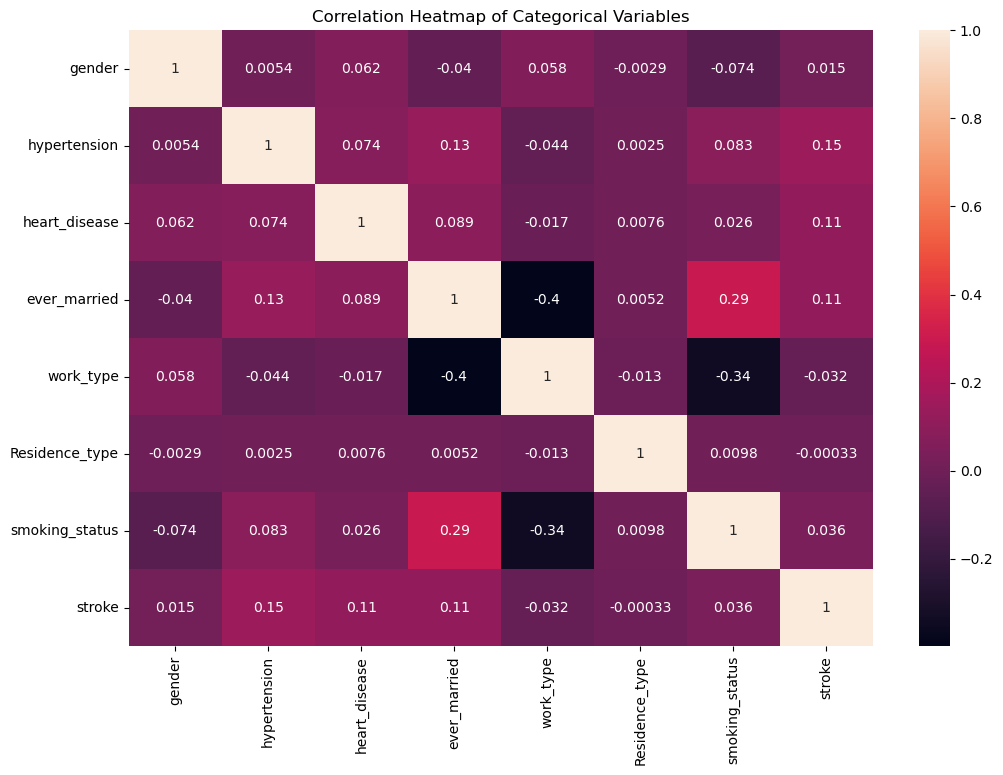

In [31]:
df_2=df.copy()
for var in cat_df:
    df_2[var]=df_2[var].astype('category').cat.codes
corr_matrix=df_2[cat_df].corr()

plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix,annot=True)
plt.title('Correlation Heatmap of Categorical Variables')
plt.show()

### Weight of Evidence (WOE) and Information Value (IV)

- Weight of Evidence (WoE) is a statistical technique used to measure the strength of a categorical predictor variable in predicting an outcome.
- Information Value (IV) is a measure used in predictive modeling to quantify the predictive power of a variable.

In [54]:
def calculate_woe_iv(df,feature,target):
    # Cross-tabulation of feature and target variable
    crosstab = pd.crosstab(df[feature],df[target])
    
    # Calculation of the percentage of events and non-events
    crosstab['perc_event']=crosstab[1]/crosstab[1].sum()
    crosstab['perc_non_event']=crosstab[0]/crosstab[0].sum()
    
    # Calculation of WoE
    crosstab['woe'] = np.log(crosstab['perc_event']/crosstab['perc_non_event'])
    
    # Handling infinite values in WoE
    crosstab.replace({'woe': {np.inf:0,-np.inf:0}},inplace=True)
     # Calculation of IV
    crosstab['iv']=(crosstab['perc_event']-crosstab['perc_non_event'])*crosstab['woe']
    
    return crosstab['woe'],crosstab['iv'].sum()

# Example usage for 'gender' column
woe_gender, iv_gender=calculate_woe_iv(df,'gender','stroke')
woe_ever_married, iv_ever_married=calculate_woe_iv(df,'ever_married','stroke')
woe_work_type, iv_work_type=calculate_woe_iv(df, 'work_type', 'stroke')
woe_Residence_type, iv_Residence_type=calculate_woe_iv(df,'Residence_type','stroke')
woe_smoking_status, iv_smoking_status=calculate_woe_iv(df,'smoking_status','stroke')

# Print the results
woe_heart_disease, iv_heart_disease = calculate_woe_iv(df, 'heart_disease', 'stroke')

# Calculating WoE and IV for hypertension
woe_hypertension, iv_hypertension = calculate_woe_iv(df, 'hypertension', 'stroke')

# Printing the results
print(f'WoE for heart_disease: {woe_heart_disease}')
print(f'IV for heartdisease: {iv_heart_disease}')
print(f'WoE for hypertension: {woe_hypertension}')
print(f'IV for hypertension: {iv_hypertension}')
print(f'WoE for gender: {woe_gender}')
print(f'IV for gender: {iv_gender}')
print(f'WoE for ever_married: {woe_ever_married}')
print(f'IV for ever_married: {iv_ever_married}')
print(f'WoE for work_type: {woe_work_type}')
print(f'IV for work_type: {iv_work_type}')
print(f'WoE for Residence_type: {woe_Residence_type}')
print(f'IV for Residence_type: {iv_Residence_type}')
print(f'WoE for smoking_status: {woe_smoking_status}')
print(f'IV for smoking_status: {iv_smoking_status}')

WoE for heart_disease: heart_disease
0   -0.090262
1    1.661138
Name: woe, dtype: float64
IV for heartdisease: 0.14816267837463273
WoE for hypertension: hypertension
0   -0.182211
1    1.546367
Name: woe, dtype: float64
IV for hypertension: 0.27551501437684367
WoE for gender: gender
0   -0.060719
1    0.091485
2    0.000000
Name: woe, dtype: float64
IV for gender: 0.005554243505593229
WoE for ever_married: ever_married
0   -1.634112
1    0.337098
Name: woe, dtype: float64
IV for ever_married: 0.5274888923866903
WoE for work_type: work_type
0    0.089986
1    0.000000
2    0.003304
3    0.722472
4   -4.474427
Name: woe, dtype: float64
IV for work_type: 0.7079023124305742
WoE for Residence_type: Residence_type
0    0.001661
1   -0.001669
Name: woe, dtype: float64
IV for Residence_type: 2.7725811159773796e-06
WoE for smoking_status: smoking_status
0   -0.570345
1    0.527549
2   -0.009624
3    0.208687
Name: woe, dtype: float64
IV for smoking_status: 0.13610197111902075


- The WoE for 'Male' is positive, indicating that males are more likely to have a stroke.
- WoE value for "Children" suggests that this category is strongly negatively associated with stroke, while "Self-employed" shows a strong positive association.
- 'gender' has a very weak predictive power for stroke.
- The IV value is moderately high (0.527489), indicating 'ever_married' is a strong predictor of stroke.
- The IV value is high (0.707902), indicating 'work_type' is a strong predictor of stroke.
- The IV value is extremely low (0.000003), indicating 'Residence_type' has no predictive power for stroke.
- The IV value is moderate (0.136102), indicating 'smoking_status' has some predictive power for stroke.

<div style="border: 2px solid black; padding: 10px;">
    
- **Strong Predictors :** Heart disease, hypertension, work type, and marital status.
- **Moderate Predictors:** Smoking status.
- **Weak Predictors:** Gender, residence type.

</div>

***

- **It seemed like both BMI and Age were positively correlated, though the association was not strong.**
- **Older one has more likely to suffer a stroke than a younger ones.**
- **Higher BMI does not increase the stroke risk.**
- **Diabetes is one of the risk factors for stroke occurrence.**
- **Higher proportion of patients who suffered from hypertension or heart disease experienced a stroke.**
- **Regardless of patient’s gender, and where they stayed, they have the same likelihood to experience stroke.**

***

In [33]:
scaler = StandardScaler()
df[['age']]=scaler.fit_transform(df[['age']])
min_max_scaler = MinMaxScaler()
df[['avg_glucose_level']] = min_max_scaler.fit_transform(df[['avg_glucose_level']])
df[['bmi']] = min_max_scaler.fit_transform(df[['bmi']])

In [34]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,Male,-0.625710,0,0,Yes,Private,Urban,0.114465,0.297994,never smoked,0
1,1,Male,-0.392544,0,0,Yes,Private,Rural,0.109332,0.194842,formerly smoked,0
2,2,Female,0.027154,0,0,Yes,Private,Rural,0.224974,0.429799,Unknown,0
3,3,Male,0.680018,0,0,Yes,Private,Urban,0.045437,0.265043,never smoked,0
4,4,Female,-0.812243,0,0,No,Private,Rural,0.085413,0.265043,never smoked,0


In [35]:
label_gender=LabelEncoder()
label_married=LabelEncoder()
label_work=LabelEncoder()
label_residence=LabelEncoder()
label_smoking=LabelEncoder()

In [36]:
df['gender']=label_gender.fit_transform(df['gender'])
df['ever_married']=label_married.fit_transform(df['ever_married'])
df['work_type']=label_work.fit_transform(df['work_type'])
df['Residence_type']=label_residence.fit_transform(df['Residence_type'])
df['smoking_status']=label_smoking.fit_transform(df['smoking_status'])


In [37]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,1,-0.625710,0,0,1,2,1,0.114465,0.297994,2,0
1,1,1,-0.392544,0,0,1,2,0,0.109332,0.194842,1,0
2,2,0,0.027154,0,0,1,2,0,0.224974,0.429799,0,0
3,3,1,0.680018,0,0,1,2,1,0.045437,0.265043,2,0
4,4,0,-0.812243,0,0,0,2,0,0.085413,0.265043,2,0


In [38]:
X=df.drop('stroke',axis=1)
X.head()
Y=df['stroke']
Y
X

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
0,0,1,-0.625710,0,0,1,2,1,0.114465,0.297994,2
1,1,1,-0.392544,0,0,1,2,0,0.109332,0.194842,1
2,2,0,0.027154,0,0,1,2,0,0.224974,0.429799,0
3,3,1,0.680018,0,0,1,2,1,0.045437,0.265043,2
4,4,0,-0.812243,0,0,0,2,0,0.085413,0.265043,2
...,...,...,...,...,...,...,...,...,...,...,...
15299,15299,0,-0.905509,0,0,0,0,1,0.081976,0.131805,2
15300,15300,0,0.213687,1,0,1,2,1,0.216452,0.312321,2
15301,15301,0,1.566048,0,0,1,3,1,0.152886,0.227794,2
15302,15302,1,0.213687,0,0,1,2,0,0.216169,0.174785,0


In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=10)

###  Decision tree

In [40]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
dt=DecisionTreeClassifier()
dt.fit(X_train,Y_train)
Y_pred=dt.predict(X_test)
ac_dt=accuracy_score(Y_test,Y_pred)
cm=confusion_matrix(Y_test,Y_pred)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(Y_test,Y_pred))


              precision    recall  f1-score   support

           0       0.96      0.95      0.96      4399
           1       0.16      0.21      0.18       193

    accuracy                           0.92      4592
   macro avg       0.56      0.58      0.57      4592
weighted avg       0.93      0.92      0.93      4592



### Logistics


In [41]:
lr=LogisticRegression()
lr.fit(X_train,Y_train)
Y_pred_lr=lr.predict(X_test)
ac_lr=accuracy_score(Y_test,Y_pred_lr)
ac_lr
cm=confusion_matrix(Y_test,Y_pred_lr)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(Y_test,Y_pred_lr))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4399
           1       0.36      0.02      0.04       193

    accuracy                           0.96      4592
   macro avg       0.66      0.51      0.51      4592
weighted avg       0.93      0.96      0.94      4592



### KNN

In [42]:
knn=KNeighborsClassifier()
knn.fit(X_train,Y_train)
Y_pred_knn=knn.predict(X_test)
ac_knn=accuracy_score(Y_test,Y_pred_knn)
cm=confusion_matrix(Y_test,Y_pred_knn)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(Y_test,Y_pred_knn))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4399
           1       0.00      0.00      0.00       193

    accuracy                           0.96      4592
   macro avg       0.48      0.50      0.49      4592
weighted avg       0.92      0.96      0.94      4592



### RandomForest

In [43]:
rf=RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf=rf.predict(X_test)
ac_rf=accuracy_score(Y_test,Y_pred_rf)
cm=confusion_matrix(Y_test,Y_pred_rf)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(Y_test,Y_pred_rf))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4399
           1       0.50      0.05      0.09       193

    accuracy                           0.96      4592
   macro avg       0.73      0.52      0.54      4592
weighted avg       0.94      0.96      0.94      4592



### SVC

In [44]:
sv=SVC()
sv.fit(X_train,Y_train)
Y_pred_sv=sv.predict(X_test)
ac_sv=accuracy_score(Y_test,Y_pred_sv)
cm=confusion_matrix(Y_test,Y_pred_sv)
conf_matrix=pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
print(classification_report(Y_test,Y_pred_sv))


              precision    recall  f1-score   support

           0       0.96      1.00      0.98      4399
           1       0.00      0.00      0.00       193

    accuracy                           0.96      4592
   macro avg       0.48      0.50      0.49      4592
weighted avg       0.92      0.96      0.94      4592



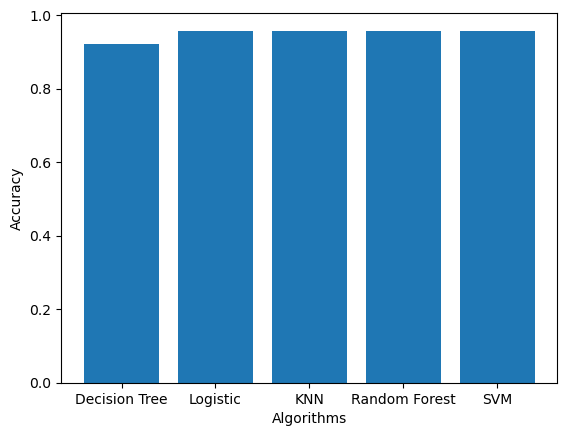

In [45]:
a=plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac_dt,ac_lr,ac_knn,ac_rf,ac_sv])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

### SMOTE

<div style="border: 2px solid black; padding: 10px;">

- SMOTE (Synthetic Minority Over-sampling Technique) is a popular technique used to address class imbalance by generating synthetic samples for the minority class. This helps to balance the distribution of classes and can improve the performance of classification models, especially when the minority class is underrepresented.
- Only 632 of the total dataset is positive for stroke(4.1%) i.e unbalanced target variable.
- We can use SMOTE(Synthetic Minority Oversampling Technique) to increase(oversample) the target varaible. It works by duplicating examples in the minority class.
 </div>

In [46]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score
import matplotlib.pyplot as plt

In [47]:
X = df.drop('stroke',axis=1)
y = df['stroke']
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = encoder.fit_transform(X[categorical_columns])

# Create a DataFrame with encoded categorical variables
encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Drop original categorical columns and concatenate encoded columns
X = X.drop(categorical_columns, axis=1).reset_index(drop=True)
X_encoded = pd.concat([X, encoded_df], axis=1)
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_encoded, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = RandomForestClassifier(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba))

Accuracy: 0.9773385585278582
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2983
           1       0.99      0.96      0.98      2886

    accuracy                           0.98      5869
   macro avg       0.98      0.98      0.98      5869
weighted avg       0.98      0.98      0.98      5869

ROC-AUC Score: 0.9964585062640712


In [48]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_scaled, y_train)
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_proba_log_reg = log_reg.predict_proba(X_test_scaled)[:, 1]
ac1_lr=accuracy_score(y_test, y_pred_log_reg)
print("Logistic Regression")
print("Accuracy:", ac1_lr)
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_log_reg))
print("\n")

Logistic Regression
Accuracy: 0.8343840517975805
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.81      0.83      2983
           1       0.81      0.86      0.84      2886

    accuracy                           0.83      5869
   macro avg       0.84      0.83      0.83      5869
weighted avg       0.84      0.83      0.83      5869

ROC-AUC Score: 0.9071844866347044




In [49]:
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)
y_pred_proba_knn = knn.predict_proba(X_test_scaled)[:, 1]
ac1_knn=accuracy_score(y_test, y_pred_knn)
print("K-Nearest Neighbors")
print("Accuracy:",ac1_knn )
print("Classification Report:\n", classification_report(y_test, y_pred_knn))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_knn))
print("\n")

K-Nearest Neighbors
Accuracy: 0.9386607599250298
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.90      0.94      2983
           1       0.90      0.98      0.94      2886

    accuracy                           0.94      5869
   macro avg       0.94      0.94      0.94      5869
weighted avg       0.94      0.94      0.94      5869

ROC-AUC Score: 0.980797515326513




In [50]:
svc = SVC(probability=True, random_state=42) 
svc.fit(X_train_scaled, y_train)

y_pred_svc = svc.predict(X_test_scaled)
y_pred_proba_svc = svc.predict_proba(X_test_scaled)[:, 1]
ac1_svc=accuracy_score(y_test, y_pred_svc)
print("Support Vector Classifier")
print("Accuracy:", ac1_svc)
print("Classification Report:\n", classification_report(y_test, y_pred_svc))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_svc))

Support Vector Classifier
Accuracy: 0.933549156585449
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.95      0.94      2983
           1       0.95      0.91      0.93      2886

    accuracy                           0.93      5869
   macro avg       0.93      0.93      0.93      5869
weighted avg       0.93      0.93      0.93      5869

ROC-AUC Score: 0.9848822816472834


In [51]:
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train_scaled, y_train)
y_pred_tree = tree.predict(X_test_scaled)
y_pred_proba_tree = tree.predict_proba(X_test_scaled)[:, 1]
ac1_dt=accuracy_score(y_test, y_pred_tree)
print("Decision Tree Classifier")
print("Accuracy:",ac1_dt)
print("Classification Report:\n", classification_report(y_test, y_pred_tree))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_tree))
print("\n")

Decision Tree Classifier
Accuracy: 0.9545067302777305
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.96      2983
           1       0.95      0.96      0.95      2886

    accuracy                           0.95      5869
   macro avg       0.95      0.95      0.95      5869
weighted avg       0.95      0.95      0.95      5869

ROC-AUC Score: 0.9545196515528397




In [52]:
forest = RandomForestClassifier(random_state=42)
forest.fit(X_train_scaled, y_train)
y_pred_forest = forest.predict(X_test_scaled)
y_pred_proba_forest = forest.predict_proba(X_test_scaled)[:, 1]
ac1_rf=accuracy_score(y_test, y_pred_forest)
print("Random Forest Classifier")
print("Accuracy:", ac1_rf)
print("Classification Report:\n", classification_report(y_test, y_pred_forest))
print("ROC-AUC Score:", roc_auc_score(y_test, y_pred_proba_forest))
print("\n")

Random Forest Classifier
Accuracy: 0.9773385585278582
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      2983
           1       0.99      0.96      0.98      2886

    accuracy                           0.98      5869
   macro avg       0.98      0.98      0.98      5869
weighted avg       0.98      0.98      0.98      5869

ROC-AUC Score: 0.9964585062640712




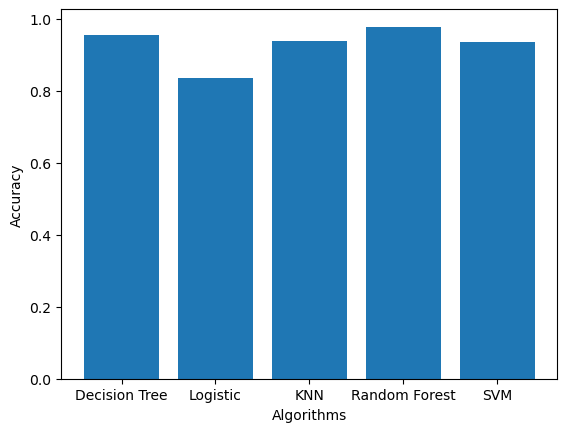

In [53]:
b=plt.bar(['Decision Tree','Logistic','KNN','Random Forest','SVM'],[ac1_dt,ac1_lr,ac1_knn,ac1_rf,ac1_svc])
plt.xlabel("Algorithms")
plt.ylabel("Accuracy")
plt.show()

<div style="border: 2px solid black; padding: 10px;">
    
Here are some reasons why SMOTE might not be recommended:
- Risk of Overfitting:
- Creation of Unrepresentative Samples:
- The process of generating synthetic samples can introduce bias

</div>


### References

- https://www.nhlbi.nih.gov/health/educational/lose_wt/BMI/bmicalc.htm
- https://www.who.int/news-room/fact-sheets/detail/hypertension#:~:text=Overview,get%20your%20blood%20pressure%20checked.
- https://www.ibm.com/topics/feature-engineering
- https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/
- https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/#:~:text=SMOTE%3A%20Synthetic%20Minority%20Oversampling%20Technique,-SMOTE%20is%20an&text=This%20algorithm%20helps%20to%20overcome,positive%20instances%20that%20lie%20together.